## Session #2

### S2.I

In [1]:
%pip install MITgcmutils

  Using cached MITgcmutils-0.1.2-py3-none-any.whl (49 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import MITgcmutils
import numpy as np
import math
import matplotlib.pyplot as plt
from MITgcmutils import jmd95
import os
# Specify your file name and possibly the path to this file
filein = 'trenberth_taux.bin'
# MITgcm likes its binary in big endian, float ('>f') or double ('>d')
raw = np.fromfile(filein, dtype='>f')
# reshape raw to a numpy array of dimensions (12,40, 90) (time,lat,lon)
taux = np.reshape(raw, (12,40,90))

In [3]:
spacing = (80 - (-80)) / (40-1) 
index = (-(30) - (-80)) / spacing 
index=math.floor(index)
print(index)

12


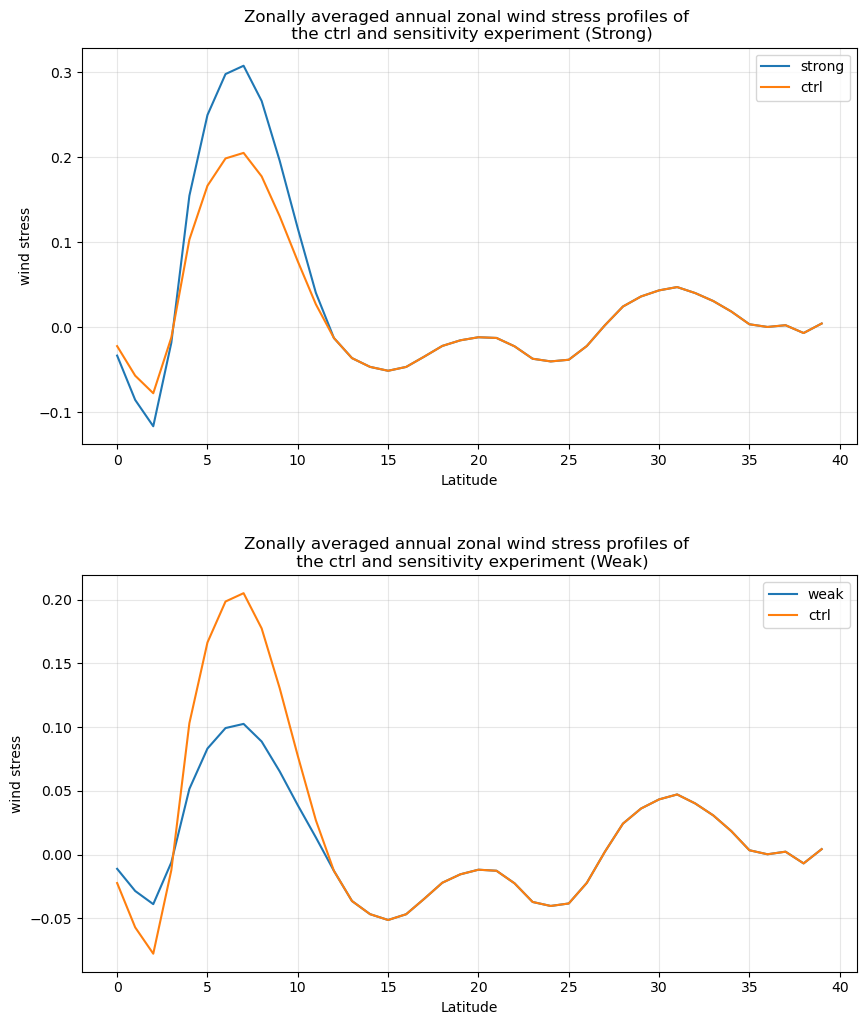

In [4]:
#-----------lat-----------
lat=np.arange(0,40)

#-----------ctrl----------
taux_zonal_average=np.mean(taux, axis=(0,2))

#----------strong---------
taux_strong=np.copy(taux)
taux_strong[:,0:index,:]=taux_strong[:,0:index,:]*1.5
taux_strong_zonal_average=np.mean(taux_strong,axis=(0,2))

#-----------weak----------
taux_weak=np.copy(taux)
taux_weak[:,0:index,:]=taux_weak[:,0:index,:]*0.5
taux_weak_zonal_average=np.mean(taux_weak,axis=(0,2))

#----------plots----------
fig,ax=plt.subplots(2,1, figsize=(10,12))
#----------1st----------
ax[0].plot(lat,taux_strong_zonal_average,label='strong')
ax[0].plot(lat,taux_zonal_average,label='ctrl')
ax[0].set_title('Zonally averaged annual zonal wind stress profiles of \n the ctrl and sensitivity experiment (Strong)')
ax[0].set_ylabel('wind stress')
ax[0].set_xlabel('Latitude')
ax[0].legend()
ax[0].grid(alpha=0.3)
#----------2nd----------
ax[1].plot(lat,taux_weak_zonal_average, label='weak')
ax[1].plot(lat,taux_zonal_average,label='ctrl')
ax[1].set_title('Zonally averaged annual zonal wind stress profiles of \n the ctrl and sensitivity experiment (Weak)')
ax[1].set_ylabel('wind stress')
ax[1].set_xlabel('Latitude')
ax[1].legend()
ax[1].grid(alpha=0.3)
#----------adjust----------
plt.subplots_adjust(hspace=0.33)
plt.show()

In [5]:
# record your new forcing file in binary format

#path2file='/home/jovyan/MITgcm/my__exp/strong_wind'
#taux_strong.astype(">f4").tofile(path2file + '/taux_strong.bin')
#path2file='/home/jovyan/MITgcm/my__exp/weak_wind'
#taux_weak.astype(">f4").tofile(path2file + '/taux_weak.bin')

In [65]:
xc.shape

(40, 90)

### S2.II

In [6]:
#-----------loading control data-----------
ctrl = '/home/jovyan/MITgcm/my__exp/ctrl/'
# open grid* files and load global X coordinate of cell center
nc = MITgcmutils.mnc_files(ctrl + 'mnc*/grid.t*.nc')
xc = nc.variables['XC'][:]
yc = nc.variables['YC'][:]
nc.close()
# open Diag* files and load global potential temperature
ncv = MITgcmutils.mnc_files(ctrl + 'mnc*/Diag.*.nc')
ncw = MITgcmutils.mnc_files(ctrl + 'mnc*/Sdiag_MLD.*.nc') 
ptemp_ctrl = ncv.variables['THETA'][:]
salt_ctrl=ncv.variables['SALT'][:]
Age_tracer_ctrl=ncv.variables['TRAC01'][:]
mld_ctrl=ncw.variables['MXLDEPTH'][:]
ncv.close()
ncw.close()
#--------loading observational data---------
filein = '/home/jovyan/MITgcm/my__exp/ctrl/lev_t.bin'
filein2 = '/home/jovyan/MITgcm/my__exp/ctrl/lev_s.bin'
# MITgcm likes its binary in big endian, float ('>f') or double ('>d')
raw = np.fromfile(filein, dtype='>f')
raw2 = np.fromfile(filein2, dtype='>f')
# reshape raw to a numpy array of dimensions (12,40, 90) (time,lat,lon)
ptemp_obs = np.reshape(raw, (12,15,40,90))
salt_obs = np.reshape(raw2, (12,15,40,90))

In [7]:
#Global domain calculation
ptemp_ctrl_g=np.mean(ptemp_ctrl, axis=0)
salt_ctrl_g=np.mean(salt_ctrl, axis=0)

ptemp_obs_g=np.mean(ptemp_obs, axis=0)
salt_obs_g=np.mean(salt_obs, axis=0)

ptemp_ctrl_obs_g = ptemp_ctrl_g - ptemp_obs_g
salt_ctrl_obs_g = salt_ctrl_g - salt_obs_g

#southern ocean calculation
ptemp_ctrl_s=ptemp_ctrl_g[:,0:index,:]
salt_ctrl_s=salt_ctrl_g[:,0:index,:]

ptemp_obs_s=ptemp_obs_g[:,0:index,:]
salt_obs_s=salt_obs_g[:,0:index,:]

ptemp_ctrl_obs_s = ptemp_ctrl_s- ptemp_obs_s
salt_ctrl_obs_s = salt_ctrl_s - salt_obs_s

xcc=xc[0:index]
ycc=yc[0:index]

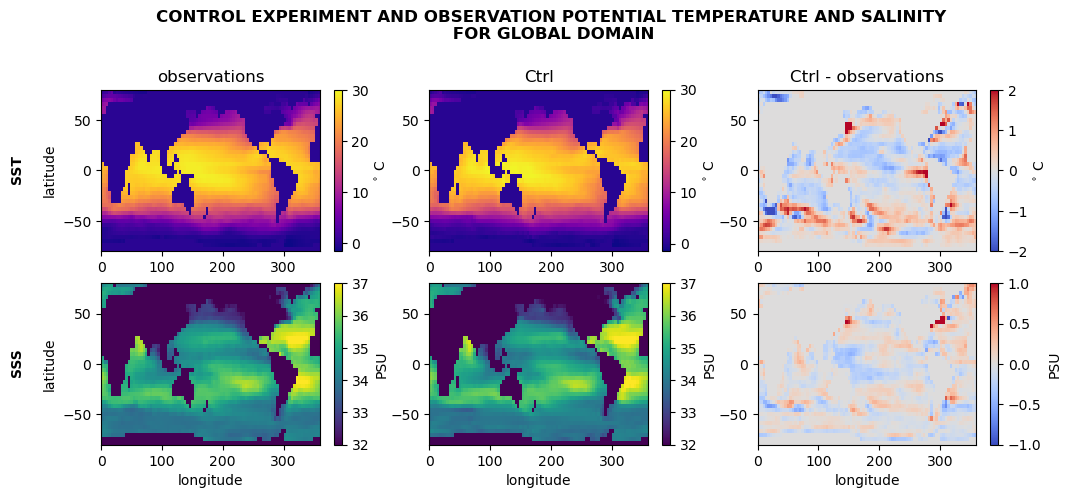

In [8]:
#Global domain

#Potential temp
fig, ax=plt.subplots(2,3, figsize=(12,5))
plt.suptitle('Control Experiment and Observation Potential Temperature and Salinity\n for Global Domain'.upper(),
             fontweight='bold')
a=ax[0,0].pcolormesh(xc, yc, ptemp_obs_g[0,:,:], cmap='plasma',  vmax=30)
ax[0,0].set_title('observations')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-150,-10,'SST', rotation='vertical', fontweight='bold')
plt.colorbar(a, label='$^{\circ}$ C')

b=ax[0,1].pcolormesh(xc, yc, ptemp_ctrl_g[0,:,:], cmap='plasma',  vmax=30)
ax[0,1].set_title('Ctrl')
plt.colorbar(b, label='$^{\circ}$ C')

c=ax[0,2].pcolormesh(xc, yc, ptemp_ctrl_obs_g[0,:,:], cmap='coolwarm', vmin=-2, vmax=2)
ax[0,2].set_title('Ctrl - observations')
plt.colorbar(c, label='$^{\circ}$ C')


#salinity
d=ax[1,0].pcolormesh(xc, yc, salt_obs_g[0,:,:],  cmap='viridis', vmin=32, vmax=37)
#ax[1,0].set_title('observations')
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-150,-10,'SSS', rotation='vertical', fontweight='bold')
plt.colorbar(d, label='PSU')

e=ax[1,1].pcolormesh(xc, yc, salt_ctrl_g[0,:,:], cmap='viridis', vmin=32, vmax=37)
#ax[1,1].set_title('Ctrl')
ax[1,1].set_xlabel('longitude')
plt.colorbar(e, label='PSU')

f=ax[1,2].pcolormesh(xc, yc, salt_ctrl_obs_g[0,:,:], cmap='coolwarm', vmin=-1, vmax=1)
#ax[1,2].set_title('Ctrl - observations')
ax[1,2].set_xlabel('longitude')
plt.colorbar(f, label='PSU')

#----------adjust----------
plt.subplots_adjust(top=0.82, wspace=0.2)
plt.show()

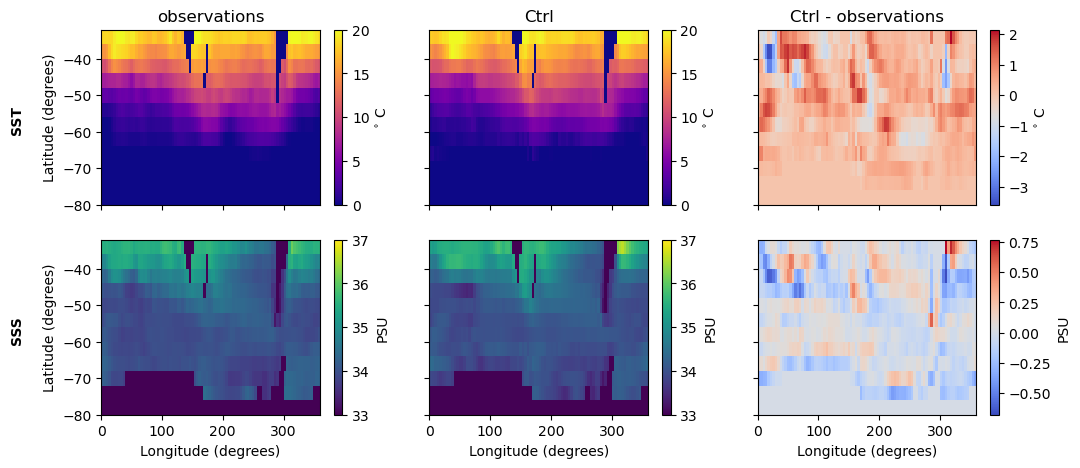

In [9]:
#Southern ocean domain

#Potential temp
fig, ax=plt.subplots(2,3, figsize=(12,5), sharex=True, sharey=True)
#plt.suptitle('Model and Observational Field Sea surface temperature and Salinity'.upper(),
             #fontweight='bold', y=1.01)
a=ax[0,0].pcolormesh(xcc, ycc, ptemp_obs_s[0,:,:], cmap='plasma',  vmin=0, vmax=20)
ax[0,0].set_title('observations')
ax[0,0].set_ylabel('Latitude (degrees)')
ax[0,0].text(-150,-60,'SST', rotation='vertical', fontweight='bold')
plt.colorbar(a, label='$^{\circ}$ C')

b=ax[0,1].pcolormesh(xcc, ycc, ptemp_ctrl_s[0,:,:], cmap='plasma',  vmin=0, vmax=20)
ax[0,1].set_title('Ctrl')
plt.colorbar(b, label='$^{\circ}$ C')

c=ax[0,2].pcolormesh(xcc, ycc, ptemp_ctrl_obs_s[0,:,:], cmap='coolwarm',)
ax[0,2].set_title('Ctrl - observations')
plt.colorbar(c, label='$^{\circ}$ C')


#salinity
d=ax[1,0].pcolormesh(xcc, ycc, salt_obs_s[0,:,:],  cmap='viridis', vmin=33, vmax=37)
#ax[1,0].set_title('observations')
ax[1,0].set_xlabel('Longitude (degrees)')
ax[1,0].set_ylabel('Latitude (degrees)')
ax[1,0].text(-150,-60,'SSS', rotation='vertical', fontweight='bold')
plt.colorbar(d, label='PSU')

e=ax[1,1].pcolormesh(xcc, ycc, salt_ctrl_s[0,:,:], cmap='viridis',vmin=33, vmax=37)
#ax[1,1].set_title('Ctrl')
ax[1,1].set_xlabel('Longitude (degrees)')
plt.colorbar(e, label='PSU')

f=ax[1,2].pcolormesh(xcc, ycc, salt_ctrl_obs_s[0,:,:], cmap='coolwarm', )
#ax[1,2].set_title('Ctrl - observations')
ax[1,2].set_xlabel('Longitude (degrees)')
plt.colorbar(f, label='PSU')

#----------adjust----------
plt.subplots_adjust( wspace=0.2)
plt.savefig('method1.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
#function for calculating the potential density
def compute_potential_density(salinity, temperature, pressure):
    return jmd95.densjmd95(salinity, temperature, pressure)

obs_potential_density = compute_potential_density(salt_obs, ptemp_obs, 0)

#function for calculating the mld
def calculate_mld(potential_density, salinity, temperature):
    mld = np.zeros((12, salinity.shape[2], salinity.shape[3]))
    
    for t in range(12):
        surface_potential_density = compute_potential_density(salinity[t, 0, :, :], 
                                                              temperature[t, 0, :, :] - 0.8, 0)
        
        for x in range(potential_density.shape[2]):
            for y in range(potential_density.shape[3]):
                difference = np.abs(potential_density[t, :, x, y] - surface_potential_density[x, y])
                min_depth_index = np.argmin(difference)
                mld[t, x, y] = 25*(min_depth_index + 1)
    
    return mld

mld_obs = calculate_mld(obs_potential_density, salt_obs, ptemp_obs)

#selecting southern ocean
mld_obs_s=mld_obs[:,0:index, :]

In [11]:
#Reshape the array to group the time steps into 10 years of 12 months each
mld_ctrl_reshaped = mld_ctrl.reshape(-1, 12, 1, 40, 90)

#Compute the mean along the years axis (axis=0) to get the average for each month
mld_ctrl_monthly_av =mld_ctrl_reshaped.mean(axis=0)

#Compute the mean along the years axis (axis=1) to get (12,40,90)
mld_ctrl_monthly_avg =mld_ctrl_monthly_av.mean(axis=1)

#Selecting southern ocean
mld_ctrl_s=mld_ctrl_monthly_avg[:,0:index, :]

In [12]:
# Define the indices for summer and winter months for southern ocean
summer_indices = [0, 1, 11] 
winter_indices = [5, 6, 7]  

# Select summer and winter months from the obs values
mld_obs_s_summer = mld_obs_s[summer_indices, :, :]
mld_obs_s_winter = mld_obs_s[winter_indices, :, :]

# Select summer and winter months from the ctrl values
mld_ctrl_s_summer = mld_ctrl_s[summer_indices, :, :]
mld_ctrl_s_winter = mld_ctrl_s[winter_indices, :, :]

#finding seasonal average using a function
def season_average(season):
    season_avg=np.mean(season, axis=0)
    return season_avg


#observation
mld_obs_s_summer_avg = season_average(mld_obs_s_summer)
mld_obs_s_winter_avg = season_average(mld_obs_s_winter)

#ctrl
mld_ctrl_s_summer_avg = season_average(mld_ctrl_s_summer)
mld_ctrl_s_winter_avg = season_average(mld_ctrl_s_winter)

#ctrl - observation
delta_mld_ctrl_obs_summer_avg=mld_ctrl_s_summer_avg - mld_obs_s_summer_avg 
delta_mld_ctrl_obs_winter_avg=mld_ctrl_s_winter_avg - mld_obs_s_winter_avg

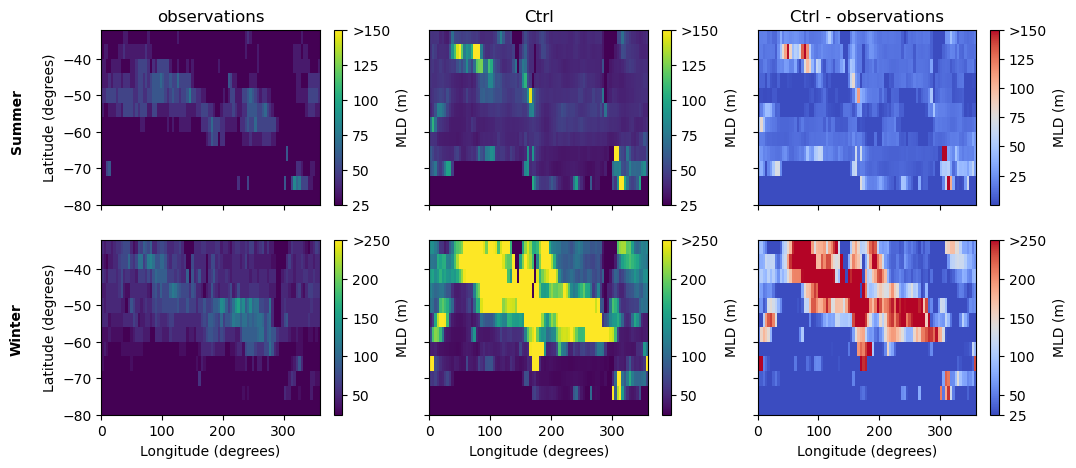

In [13]:
#Southern ocean domain

#summer mld
fig, ax=plt.subplots(2,3, figsize=(12,5), sharey=True, sharex=True)
#plt.suptitle('Model and Observational Field Summer and Winter Mixed layer depth'.upper(),
             #fontweight='bold', y=1.01)
a=ax[0,0].pcolormesh(xcc, ycc, mld_obs_s_summer_avg,vmin=25, vmax=150, )
ax[0,0].set_title('observations')
ax[0,0].set_ylabel('Latitude (degrees)')
ax[0,0].text(-150,-65,'Summer', rotation='vertical', fontweight='bold')
cbara=plt.colorbar(a, label='MLD (m)' )
cbara.set_ticks([25, 50, 75, 100, 125, 150])
cbara.set_ticklabels(['25', '50', '75', '100', '125', '>150'])


b=ax[0,1].pcolormesh(xcc, ycc, mld_ctrl_s_summer_avg, vmin=25, vmax=150)
ax[0,1].set_title('Ctrl')
cbarb=plt.colorbar(b,  label='MLD (m)')
cbarb.set_ticks([25, 50, 75, 100, 125, 150])
cbarb.set_ticklabels(['25', '50', '75', '100', '125', '>150'])

c=ax[0,2].pcolormesh(xcc, ycc, delta_mld_ctrl_obs_summer_avg, cmap='coolwarm',vmin=0, vmax=150)
ax[0,2].set_title('Ctrl - observations')
cbarc=plt.colorbar(c, label='MLD (m)')
cbarc.set_ticks([25,50, 75, 100, 125, 150])
cbarc.set_ticklabels(['25', '50', '75', '100', '125', '>150'])

#winter mld
d=ax[1,0].pcolormesh(xcc, ycc, mld_obs_s_winter_avg, vmin=25, vmax=250)
ax[1,0].set_xlabel('Longitude (degrees)')
ax[1,0].set_ylabel('Latitude (degrees)')
ax[1,0].text(-150,-63,'Winter', rotation='vertical', fontweight='bold')
cbard=plt.colorbar(d, label='MLD (m)')
cbard.set_ticks([50, 100, 150, 200, 250])
cbard.set_ticklabels([ '50', '100', '150', '200', '>250'])

e=ax[1,1].pcolormesh(xcc, ycc, mld_ctrl_s_winter_avg, vmin=25, vmax=250)
ax[1,1].set_xlabel('Longitude (degrees)')
cbare=plt.colorbar(e, label='MLD (m)')
cbare.set_ticks([50, 100, 150, 200, 250])
cbare.set_ticklabels(['50', '100', '150', '200', '>250'])

f=ax[1,2].pcolormesh(xcc, ycc, delta_mld_ctrl_obs_winter_avg, cmap='coolwarm', vmin=25, vmax=250)
ax[1,2].set_xlabel('Longitude (degrees)')
cbar=plt.colorbar(f, label='MLD (m)')
cbar.set_ticks([25, 50, 100, 150, 200, 250])
cbar.set_ticklabels(['25','50', '100', '150', '200', '>250'])
#----------adjust----------
plt.subplots_adjust(wspace=0.2)
plt.savefig('method2.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
delta_mld_ctrl_obs_summer_avg.max()

253.18946329752603

## Session #3

### S3.I

In [15]:
ctrl = '/home/jovyan/MITgcm/my__exp/ctrl/'
spinup_data='/home/shared/spinup/mnc0001/'

# open zonal velocity
ncs = MITgcmutils.mnc_files(spinup_data + 'Diag.*.nc')
ncc = MITgcmutils.mnc_files(ctrl + 'mnc*/Diag.*.nc')
UVELMASS_spinup = ncs.variables['UVELMASS'][:]
UVELMASS_ctrl=ncc.variables['UVELMASS'][:]
ncs.close()
ncc.close()

# open grid
ncg = MITgcmutils.mnc_files(ctrl + 'mnc*/grid.t*.nc')
hfacw = ncg.variables['HFacW'][:] 
dy = ncg.variables['dyG'][:] 
dz = ncg.variables['drF'][:] 
lon = ncg.variables['XC'][:]
lat = ncg.variables['YC'][:]
ncg.close()

In [16]:
#function to calculate the transport
def compute_acc_transport(UVELMASS, hfac, dy, dz, i_drak):
    time, level, lat, lon = UVELMASS.shape
    
    # Pre-allocate arrays
    transport = np.zeros(time,)

    for t in range(time):
        transport[t] = np.sum(UVELMASS[t, :, :, i_drak] * hfac[:, :, i_drak] * 
                              dy[:, i_drak] * dz[:, np.newaxis],axis=(0,1))
    return transport/1e6


# Choose the longitude intersecting the tip of the Antarctic Peninsula and South America
lon_drak = 295
# Find the corresponding index (i_drak) for the chosen longitude
i_drak = np.argmin(np.abs(lon - lon_drak))

# Compute the zonal transport across Drake Passage for each experiment
transport_sv_spinup = compute_acc_transport(UVELMASS_spinup, hfacw, dy, dz, i_drak)
transport_sv_ctrl =compute_acc_transport(UVELMASS_ctrl, hfacw, dy, dz, i_drak)

# Concatenate the transport results from the spinup and control experiments
transport_sv_combined = np.concatenate((transport_sv_spinup, transport_sv_ctrl))

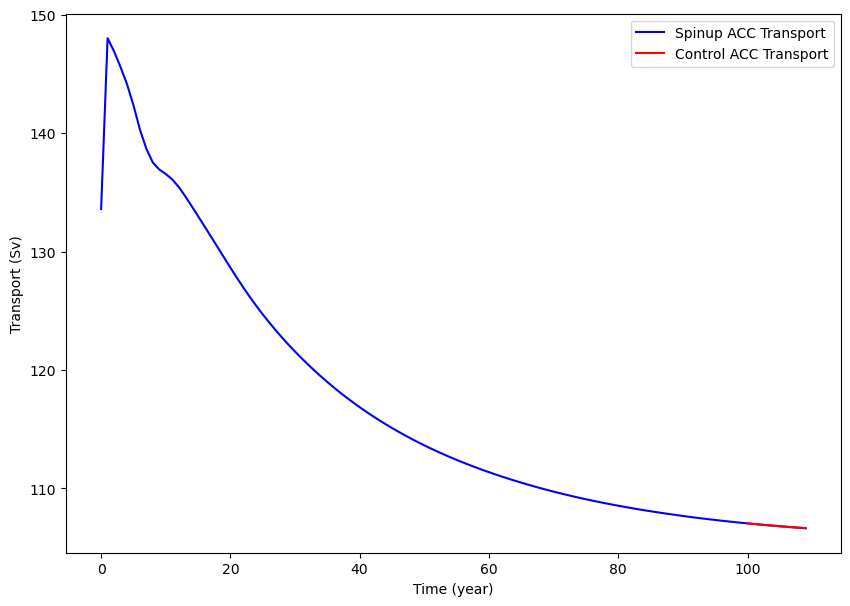

In [17]:
#Create a time array for the x-axis
time_spinup = np.arange(transport_sv_spinup.shape[0])
time_ctrl = np.arange(start=time_spinup[-1] + 1, stop=time_spinup[-1] + 1 + transport_sv_ctrl.shape[0])

# Plot the ACC transport
plt.figure(figsize=(10,7))
plt.plot(transport_sv_combined, label='Spinup ACC Transport', color='blue')
plt.plot(time_ctrl, transport_sv_ctrl, label='Control ACC Transport', color='red')
plt.xlabel('Time (year)')
#plt.xticks(np.arange(0,111,10))
#plt.xlim(0, 110)
plt.ylabel('Transport (Sv)')
#plt.title('ACC Transport across Drake Passage'.upper(), fontweight='bold')
plt.legend()
plt.savefig('method3.jpg', dpi=300)
plt.show()

#### S3.II

In [18]:
# open zonal velocity
ncc = MITgcmutils.mnc_files(ctrl + 'mnc*/Diag.*.nc')
VVELMASS_ctrl=ncc.variables['VVELMASS'][:]
GM_PsiY_ctrl=ncc.variables['GM_PsiY'][:]

ncc.close()

# open grid
ncg = MITgcmutils.mnc_files(ctrl + 'mnc*/grid.t*.nc')
hfacs = ncg.variables['HFacS'][:] 
z=ncg.variables['Z'][:]
y=ncg.variables['Y'][:]
yp1=ncg.variables['Yp1'][:]
dx = ncg.variables['dxG'][:] 
dz_prime = ncg.variables['drF'][:] 
ncg.close()

##### GM Component for ctrl

In [19]:
# Mask the zero values in GM_PsiY
GM_PsiY_ctrl_masked = np.ma.masked_where(GM_PsiY_ctrl == 0, GM_PsiY_ctrl)
# Calculate the zonal integral of GM_PsiY for each year of the simulation
time, level, lat, lon = GM_PsiY_ctrl_masked.shape
zonal_integral_GM_PsiY = np.zeros((time, level, lat))
for t in range(time):
    zonal_integral_GM_PsiY[t] = np.sum(GM_PsiY_ctrl_masked[t,:,:]*dx, axis=-1)
#converting to sv
GM_MOC_sv=zonal_integral_GM_PsiY/1e6
# Calculate the 10-year average
GM_MOC_sv_10yr_avg = np.mean(GM_MOC_sv, axis=0)

##### Eulerian-mean Component

In [20]:
#Calculate the cumulative vertical sum and zonal integral of VVELMASS
time, level, lat, lon = VVELMASS_ctrl.shape
# Pre-allocate arrays
cumulative_vertical_sum = np.zeros_like(VVELMASS_ctrl)
zonal_integral_vvelmass= np.zeros((time, level, lat))
for t in range(time):
    # Compute the cumulative vertical sum
    cumulative_vertical_sum[t] = np.cumsum(-VVELMASS_ctrl[t,::-1,...] * hfacs * dz_prime[::-1, np.newaxis, np.newaxis], axis=0)

    # Compute the zonal integral
    zonal_integral_vvelmass[t] = np.sum(cumulative_vertical_sum[t] * dx, axis=-1)
    
#converting to sv
Eulerian_MOC_sv=zonal_integral_vvelmass/1e6
# Calculate the 10-year average
Eulerian_MOC_sv_10yr_avg = np.mean(Eulerian_MOC_sv, axis=0)

##### Residual component

In [21]:
Residual_MOC=Eulerian_MOC_sv_10yr_avg+GM_MOC_sv_10yr_avg

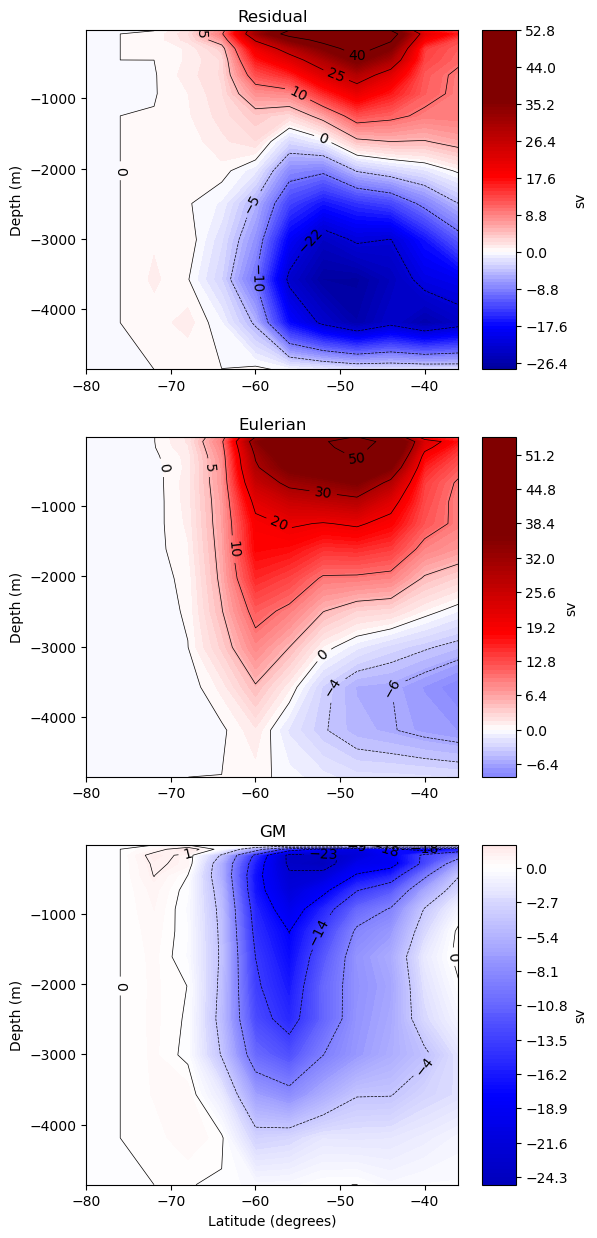

In [22]:
fig, ax=plt.subplots(3,1, figsize=(6,15), sharey=True)
#plt.suptitle('Control (Model) Meridional Overturning Circulation (MOC)'.upper(), fontweight='bold', y=1.05)
cs0=ax[0].contourf(yp1[:12], z[::-1],Residual_MOC[:,:12], cmap='seismic',levels=100, vmin=-36, vmax=36)
ct0=ax[0].contour(yp1[:12],z[::-1], Residual_MOC[:,:12], levels=[-22,-10,-5,0,5,10,25,40],colors='k',linewidths=0.5)
plt.colorbar(cs0, ax=ax[0], aspect=10, label='sv')
plt.clabel(ct0, )
ax[0].set_title('Residual')
#ax[0].set_xlabel('Latitude (degrees)')
ax[0].set_ylabel('Depth (m)')

cs1=ax[1].contourf(yp1[:12],z[::-1],Eulerian_MOC_sv_10yr_avg[:,:12],levels=100, cmap='seismic', vmin=-36, vmax=36)
ct1=ax[1].contour(yp1[:12],z[::-1],Eulerian_MOC_sv_10yr_avg[:,:12],levels=[-6,-4,0,5,10,20,30,50],colors='k',linewidths=0.5)
plt.colorbar(cs1, ax=ax[1], aspect=10, label='sv')
plt.clabel(ct1,)
ax[1].set_title('Eulerian')
#ax[1].set_xlabel('Latitude (degrees)')
ax[1].set_ylabel('Depth (m)')


cs2=ax[2].contourf(yp1[:12],z[::-1],GM_MOC_sv_10yr_avg[::-1,:12],levels=100, cmap='seismic', vmin=-36, vmax=36)
ct2=ax[2].contour(yp1[:12],z[::-1],GM_MOC_sv_10yr_avg[::-1,:12],levels=[-26,-23,-18,-14,-9,-4,0, 1],colors='k', linewidths=0.5)
plt.colorbar(cs2, ax=ax[2], aspect=10, label='sv')
plt.clabel(ct2)
ax[2].set_title('GM');
ax[2].set_xlabel('Latitude (degrees)')
ax[2].set_ylabel('Depth (m)')
plt.savefig('method4.jpg', dpi=300, bbox_inches='tight')
plt.show()

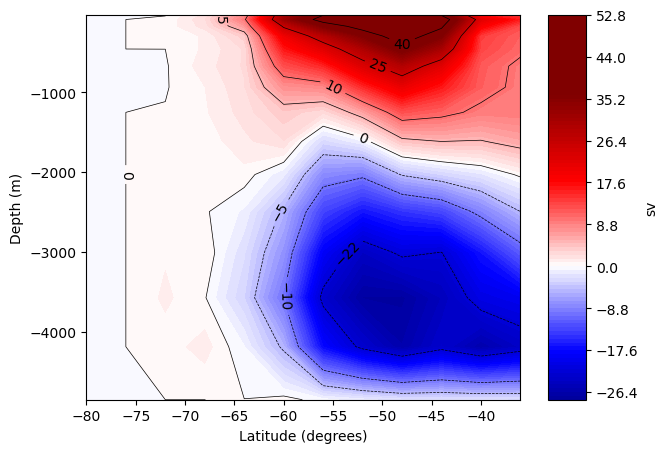

In [23]:
fig, ax=plt.subplots(figsize=(7,5), sharey=True)


cs0=ax.contourf(yp1[:12], z[::-1],Residual_MOC[:,:12], cmap='seismic',levels=100, vmin=-36, vmax=36)
ct0=ax.contour(yp1[:12],z[::-1], Residual_MOC[:,:12], levels=[-22,-10,-5,0,5,10,25,40],colors='k',linewidths=0.5)
plt.colorbar(cs0, ax=ax, aspect=10, label='sv')
plt.clabel(ct0, )
#ax[0].set_title('Residual')
#ax[0].set_xlabel('Latitude (degrees)')
#ax[0].set_ylabel('Depth (m)')
ax.set_xlabel('Latitude (degrees)')
ax.set_ylabel('Depth (m)')
plt.savefig('method4-.jpg', dpi=300, bbox_inches='tight')
plt.show()

### RESULTS

## strong

In [24]:
strong='/home/jovyan/MITgcm/my__exp/strong_wind/'

# open zonal velocity for strong
ncst = MITgcmutils.mnc_files(strong + 'mnc*/Diag.*.nc')
UVELMASS_strong=ncst.variables['UVELMASS'][:]
VVELMASS_strong=ncst.variables['VVELMASS'][:]
GM_PsiY_strong=ncst.variables['GM_PsiY'][:]
Age_tracer_strong=ncst.variables['TRAC01'][:]
ncst.close()

#open mixedlayer for strong
ncstm= MITgcmutils.mnc_files(strong + 'mnc*/Sdiag*.nc')
mld_strong=ncstm.variables['MXLDEPTH'][:]
ncstm.close()

# open grid for strong
ncstr = MITgcmutils.mnc_files(strong + 'mnc*/grid.t*.nc')
hfacs_strong  = ncstr.variables['HFacS'][:] 
z_strong =ncstr.variables['Z'][:]
y_strong =ncstr.variables['Y'][:]
yp1_strong =ncstr.variables['Yp1'][:]
dx_strong  = ncstr.variables['dxG'][:] 
dz_prime_strong = ncstr.variables['drF'][:] 
hfacw_strong = ncstr.variables['HFacW'][:] 
dy_strong = ncstr.variables['dyG'][:] 
lon_strong = ncstr.variables['XC'][:]
lat_strong = ncstr.variables['YC'][:]
ncstr.close()

##### strong mld

In [25]:
#Reshape the array to group the time steps into 10 years of 12 months each
mld_strong_reshaped = mld_strong.reshape(-1, 12, 1, 40, 90)

#Compute the mean along the years axis (axis=0) to get the average for each month
mld_strong_monthly_av =mld_strong_reshaped.mean(axis=0)

#Compute the mean along the years axis (axis=1) to get (12,40,90)
mld_strong_monthly_avg =mld_strong_monthly_av.mean(axis=1)

#Selecting southern ocean
mld_strong_s=mld_strong_monthly_avg[:,0:index, :]

#selecting winter
mld_strong_s_winter=mld_strong_s[winter_indices,:,:]

mld_strong_s_winter_avg = season_average(mld_strong_s_winter)

##### strong transport

In [26]:
# Compute the zonal transport across Drake Passage for each experiment
transport_sv_strong =compute_acc_transport(UVELMASS_strong, hfacw_strong, dy_strong, dz_prime_strong, i_drak)

# Concatenate the transport results from the spinup and control experiments
transport_strong_sv_combined = np.concatenate((transport_sv_spinup, transport_sv_strong))

##### GM Component for strong

In [27]:
# Mask the zero values in GM_PsiY
GM_PsiY_strong_masked = np.ma.masked_where(GM_PsiY_strong == 0, GM_PsiY_strong)
# Calculate the zonal integral of GM_PsiY for each year of the simulation
time, level, lat, lon = GM_PsiY_strong_masked.shape
zonal_integral_GM_PsiY_strong = np.zeros((time, level, lat))
for t in range(time):
    zonal_integral_GM_PsiY_strong[t] = np.sum(GM_PsiY_strong_masked[t,:,:]*dx_strong, axis=-1)
#converting to sv
GM_MOC_strong_sv=zonal_integral_GM_PsiY_strong/1e6
# Calculate the 10-year average
GM_MOC_strong_sv_10yr_avg = np.mean(GM_MOC_strong_sv, axis=0)

##### Eulerian-mean Component for strong

In [28]:
#Calculate the cumulative vertical sum and zonal integral of VVELMASS
time, level, lat, lon = VVELMASS_strong.shape
# Pre-allocate arrays
cumulative_vertical_strong_sum = np.zeros_like(VVELMASS_strong)
zonal_integral_vvelmass_strong= np.zeros((time, level, lat))
for t in range(time):
    # Compute the cumulative vertical sum
    cumulative_vertical_strong_sum[t] = np.cumsum(-VVELMASS_strong[t,::-1,...] * 
                                                  hfacs_strong * dz_prime_strong[::-1, np.newaxis, np.newaxis], axis=0)

    # Compute the zonal integral
    zonal_integral_vvelmass_strong[t] = np.sum(cumulative_vertical_strong_sum[t] * dx_strong, axis=-1)
    
#converting to sv
Eulerian_MOC_strong_sv=zonal_integral_vvelmass_strong/1e6
# Calculate the 10-year average
Eulerian_MOC_strong_sv_10yr_avg = np.mean(Eulerian_MOC_strong_sv, axis=0)

##### Residual Component for strong

In [29]:
Residual_MOC_strong=Eulerian_MOC_strong_sv_10yr_avg + GM_MOC_strong_sv_10yr_avg

##### Transport

## weak

In [30]:
weak='/home/jovyan/MITgcm/my__exp/weak_wind/'

# open zonal velocity for weak
ncwe = MITgcmutils.mnc_files(weak + 'mnc*/Diag*.nc')
UVELMASS_weak=ncwe.variables['UVELMASS'][:]
VVELMASS_weak=ncwe.variables['VVELMASS'][:]
GM_PsiY_weak=ncwe.variables['GM_PsiY'][:]
Age_tracer_weak=ncwe.variables['TRAC01'][:]
ncwe.close()

#open mixedlayer for weak
ncwkm= MITgcmutils.mnc_files(weak+ 'mnc*/Sdiag*.nc')
mld_weak=ncwkm.variables['MXLDEPTH'][:]
ncwkm.close()

# open grid for weak
ncwk = MITgcmutils.mnc_files(weak + 'mnc*/grid.t*.nc')
hfacs_weak = ncwk.variables['HFacS'][:] 
z_weak =ncwk.variables['Z'][:]
y_weak =ncwk.variables['Y'][:]
yp1_weak =ncwk.variables['Yp1'][:]
dx_weak = ncwk.variables['dxG'][:] 
dz_prime_weak = ncwk.variables['drF'][:] 
hfacw_weak = ncwk.variables['HFacW'][:] 
dy_weak = ncwk.variables['dyG'][:]
lon_weak = ncwk.variables['XC'][:]
lat_weak = ncwk.variables['YC'][:]
ncwk.close()

##### weak mld

In [31]:
#Reshape the array to group the time steps into 10 years of 12 months each
mld_weak_reshaped = mld_weak.reshape(-1, 12, 1, 40, 90)

#Compute the mean along the years axis (axis=0) to get the average for each month
mld_weak_monthly_av =mld_weak_reshaped.mean(axis=0)

#Compute the mean along the years axis (axis=1) to get (12,40,90)
mld_weak_monthly_avg =mld_weak_monthly_av.mean(axis=1)

#Selecting southern ocean
mld_weak_s=mld_weak_monthly_avg[:,0:index, :]

#selecting winter
mld_weak_s_winter=mld_weak_s[winter_indices,:,:]

mld_weak_s_winter_avg = season_average(mld_weak_s_winter)

##### weak transport

In [32]:
# Compute the zonal transport across Drake Passage for each experiment
transport_sv_weak =compute_acc_transport(UVELMASS_weak, hfacw_weak, dy_weak, dz_prime_weak, i_drak)

# Concatenate the transport results from the spinup and control experiments
transport_weak_sv_combined = np.concatenate((transport_sv_spinup, transport_sv_weak))

##### GM Component for weak

In [33]:
# Mask the zero values in GM_PsiY
GM_PsiY_weak_masked = np.ma.masked_where(GM_PsiY_weak == 0, GM_PsiY_weak)
# Calculate the zonal integral of GM_PsiY for each year of the simulation
time, level, lat, lon = GM_PsiY_weak_masked.shape
zonal_integral_GM_PsiY_weak = np.zeros((time, level, lat))
for t in range(time):
    zonal_integral_GM_PsiY_weak[t] = np.sum(GM_PsiY_weak_masked[t,:,:]*dx_weak, axis=-1)
#converting to sv
GM_MOC_weak_sv=zonal_integral_GM_PsiY_weak/1e6
# Calculate the 10-year average
GM_MOC_weak_sv_10yr_avg = np.mean(GM_MOC_weak_sv, axis=0)

##### Eulerian-mean Component for weak

In [34]:
#Calculate the cumulative vertical sum and zonal integral of VVELMASS
time, level, lat, lon = VVELMASS_weak.shape
# Pre-allocate arrays
cumulative_vertical_weak_sum = np.zeros_like(VVELMASS_weak)
zonal_integral_vvelmass_weak= np.zeros((time, level, lat))
for t in range(time):
    # Compute the cumulative vertical sum
    cumulative_vertical_weak_sum[t] = np.cumsum(-VVELMASS_weak[t,::-1,...] * 
                                                  hfacs_weak * dz_prime_weak[::-1, np.newaxis, np.newaxis], axis=0)

    # Compute the zonal integral
    zonal_integral_vvelmass_weak[t] = np.sum(cumulative_vertical_weak_sum[t] * dx_weak, axis=-1)
    
#converting to sv
Eulerian_MOC_weak_sv=zonal_integral_vvelmass_weak/1e6
# Calculate the 10-year average
Eulerian_MOC_weak_sv_10yr_avg = np.mean(Eulerian_MOC_weak_sv, axis=0)

##### Residual Component for weak

In [35]:
Residual_MOC_weak=Eulerian_MOC_weak_sv_10yr_avg + GM_MOC_weak_sv_10yr_avg

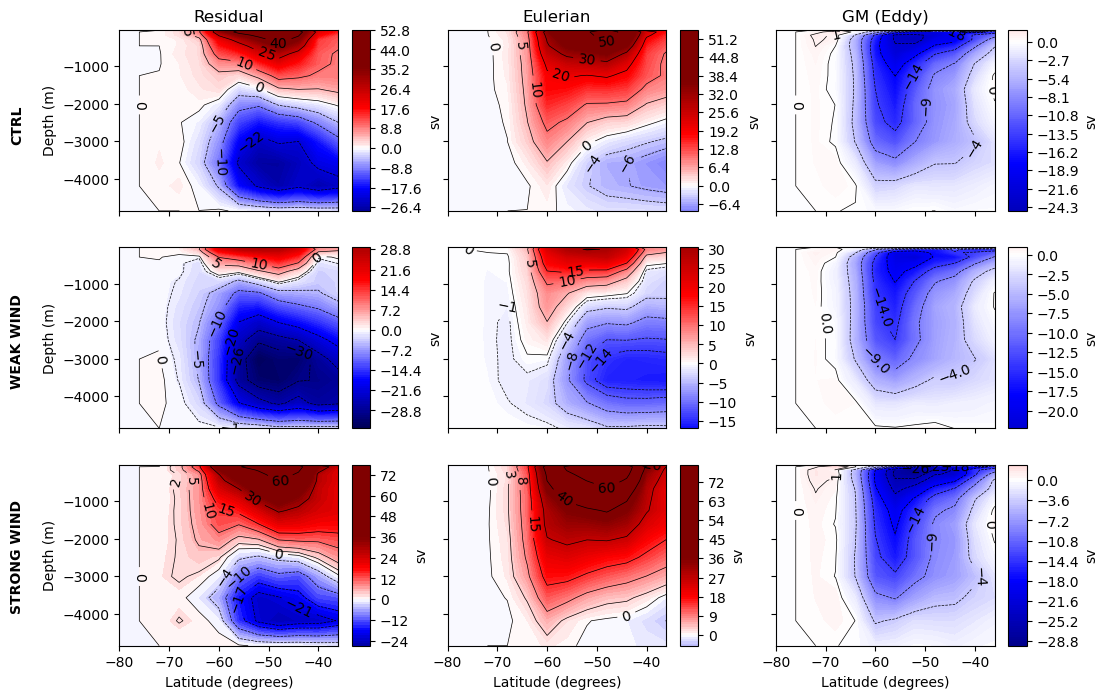

In [36]:
fig, ax=plt.subplots(3,3, figsize=(12,8), sharey=True, sharex=True)
#plt.suptitle('Eulerian, GM and residual component for each simulation'.upper(),
             #fontweight='bold', y=0.96)
#ctrl
cs0=ax[0,0].contourf(yp1[:12], z[::-1], Residual_MOC[:,:12], cmap='seismic',levels=100,  vmin=-36, vmax=36)
ct0=ax[0,0].contour(yp1[:12],z[::-1], Residual_MOC[:,:12], levels=[-22,-10,-5,0,5,10,25,40],colors='k',linewidths=0.5)
plt.colorbar(cs0, ax=ax[0,0], aspect=10, label='sv')
plt.clabel(ct0, )
ax[0,0].set_title('Residual')
ax[0,0].text(-102,-3000,'Ctrl'.upper(), rotation='vertical', fontweight='bold', )
ax[0,0].set_ylabel('Depth (m)')

cs1=ax[0,1].contourf(yp1[:12],z[::-1],Eulerian_MOC_sv_10yr_avg[:,:12],levels=100, cmap='seismic', vmin=-36, vmax=36)
ct1=ax[0,1].contour(yp1[:12],z[::-1],Eulerian_MOC_sv_10yr_avg[:,:12],levels=[-6,-4,0,5,10,20,30,50],colors='k',linewidths=0.5)
plt.colorbar(cs1, ax=ax[0,1], aspect=10, label='sv')
plt.clabel(ct1,)
ax[0,1].set_title('Eulerian')

cs2=ax[0,2].contourf(yp1[:12],z[::-1],GM_MOC_sv_10yr_avg[::-1,:12],levels=100, cmap='seismic',  vmin=-36, vmax=36)
ct2=ax[0,2].contour(yp1[:12],z[::-1],GM_MOC_sv_10yr_avg[::-1,:12],levels=[-30,-26,-23,-18,-14,-9,-4,0, 1],colors='k', linewidths=0.5)
plt.colorbar(cs2, ax=ax[0,2], aspect=10, label='sv')
plt.clabel(ct2)
ax[0,2].set_title('GM (Eddy)');

#weak
cs3=ax[1,0].contourf(yp1[:12], z[::-1],Residual_MOC_weak[:,:12], cmap='seismic',levels=100, vmin=-36, vmax=36)
ct3=ax[1,0].contour(yp1[:12],z[::-1],Residual_MOC_weak[:,:12],levels=[-30, -26, -20,-10,-5,-1,0,5,10,30,60],colors='k',linewidths=0.5)
plt.colorbar(cs3, ax=ax[1,0], aspect=10, label='sv')
plt.clabel(ct3, )
ax[1,0].text(-102,-3700,'Weak Wind'.upper(), rotation='vertical', fontweight='bold', )
ax[1,0].set_ylabel('Depth (m)')

cs4=ax[1,1].contourf(yp1[:12],z[::-1],Eulerian_MOC_weak_sv_10yr_avg[:,:12],levels=100, cmap='seismic', vmin=-36, vmax=36)
ct4=ax[1,1].contour(yp1[:12],z[::-1],Eulerian_MOC_weak_sv_10yr_avg[:,:12],levels=[-14,-12,-8,-4,-1,0,5,10,15,30,60],colors='k',linewidths=0.5)
plt.colorbar(cs4, ax=ax[1,1], aspect=10, label='sv')
plt.clabel(ct4, )


cs5=ax[1,2].contourf(yp1[:12],z[::-1],GM_MOC_weak_sv_10yr_avg[::-1,:12],levels=100, cmap='seismic',  vmin=-36, vmax=36)
ct5=ax[1,2].contour(yp1[:12],z[::-1],GM_MOC_weak_sv_10yr_avg[::-1,:12],levels=[-26,-23,-18,-14,-9,-4,0, 1.5],colors='k', linewidths=0.5)
plt.colorbar(cs5, ax=ax[1,2], aspect=10, label='sv')
plt.clabel(ct5)

#strong
cs6=ax[2,0].contourf(yp1[:12], z[::-1],Residual_MOC_strong[:,:12], cmap='seismic',levels=100, vmin=-36, vmax=36)
ct6=ax[2,0].contour(yp1[:12],z[::-1],Residual_MOC_strong[:,:12],levels=[-21,-17,-10,-4,0,2,5,10,15,30,60],colors='k',linewidths=0.5)
plt.colorbar(cs6, ax=ax[2,0], aspect=10, label='sv')
plt.clabel(ct6, )
ax[2,0].text(-102,-3900,'Strong Wind'.upper(), rotation='vertical', fontweight='bold', )
ax[2,0].set_xlabel('Latitude (degrees)')
ax[2,0].set_ylabel('Depth (m)')

cs7=ax[2,1].contourf(yp1[:12],z[::-1],Eulerian_MOC_strong_sv_10yr_avg[:,:12],levels=100, cmap='seismic', vmin=-36, vmax=36)
ct7=ax[2,1].contour(yp1[:12],z[::-1],Eulerian_MOC_strong_sv_10yr_avg[:,:12],levels=[-4,0,3,8,15,26,40,60],colors='k',linewidths=0.5)
plt.colorbar(cs7, ax=ax[2,1], aspect=10, label='sv')
plt.clabel(ct7, )
ax[2,1].set_xlabel('Latitude (degrees)')


cs8=ax[2,2].contourf(yp1[:12],z[::-1],GM_MOC_strong_sv_10yr_avg[::-1,:12],levels=100, cmap='seismic', vmin=-36, vmax=36)
ct8=ax[2,2].contour(yp1[:12],z[::-1],GM_MOC_strong_sv_10yr_avg[::-1,:12],levels=[-26,-23,-18,-14,-9,-4,0, 1],colors='k', linewidths=0.5)
plt.colorbar(cs8, ax=ax[2,2], aspect=10, label='sv')
plt.clabel(ct8)
ax[2,2].set_xlabel('Latitude (degrees)');
plt.savefig('Result 1.jpg', dpi=300, bbox_inches='tight')

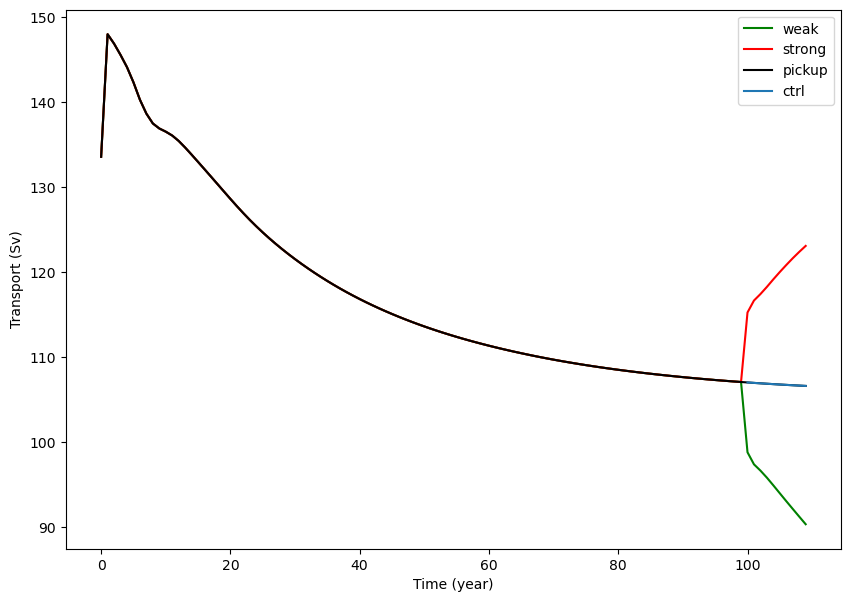

In [37]:
plt.figure(figsize=(10,7))
plt.plot(transport_weak_sv_combined, label='weak', color='green')
plt.plot(transport_strong_sv_combined, label='strong', color='red')
plt.plot(transport_sv_combined, label='pickup', color='k', )
plt.plot(time_ctrl,transport_sv_ctrl,label='ctrl')
plt.xlabel('Time (year)')
plt.ylabel('Transport (Sv)')
plt.legend()
plt.savefig('Result 1a.jpg', dpi=300, bbox_inches='tight')

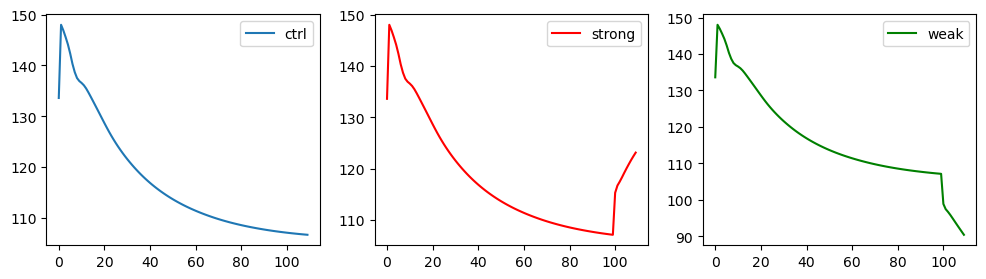

In [38]:
fig,ax=plt.subplots(1,3, figsize=(12,3))
ax[1].plot(transport_strong_sv_combined, label='strong', color='red')
ax[1].legend()
ax[2].plot(transport_weak_sv_combined, label='weak',  color='green')
ax[2].legend()
ax[0].plot(transport_sv_combined, label='ctrl')
ax[0].legend();

In [39]:
max_strong_wind=np.max(taux_strong_zonal_average)
max_weak_wind=np.max(taux_weak_zonal_average)
max_strong_transport=np.max(transport_sv_strong)
max_weak_transport=np.max(transport_sv_weak)
max_ctrl_wind=np.max(taux_zonal_average)
max_ctrl_transport=np.max(transport_sv_ctrl)
max_strong_residual=np.max(Residual_MOC_strong)
max_weak_residual=np.max(Residual_MOC_weak)
max_ctrl_residual=np.max(Residual_MOC)

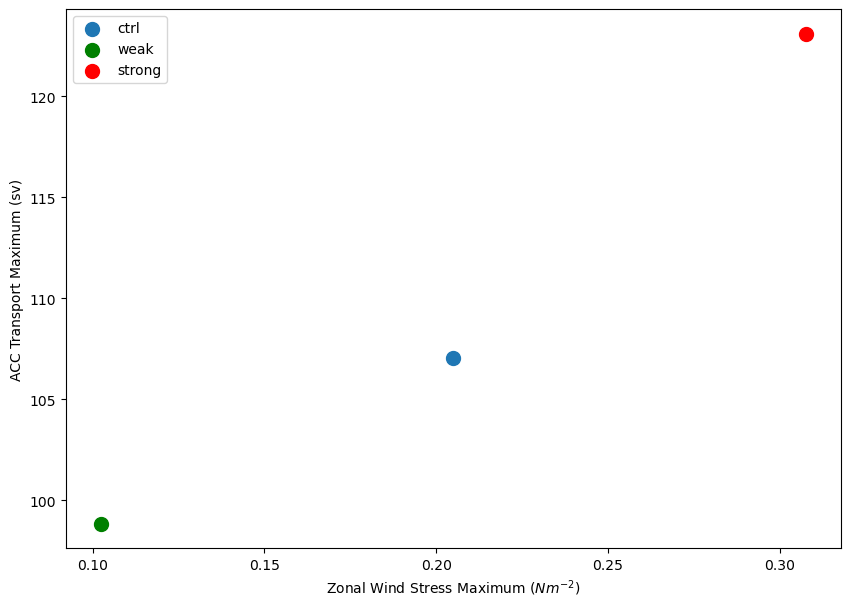

In [40]:
plt.figure(figsize=(10,7))
plt.scatter(max_ctrl_wind, max_ctrl_transport, label='ctrl', s=100,)
plt.scatter(max_weak_wind, max_weak_transport, label='weak', s=100, color='green')
plt.scatter(max_strong_wind, max_strong_transport, label='strong', s=100, color='red')
plt.xlabel('Zonal Wind Stress Maximum ($Nm^{-2}$)')
plt.ylabel('ACC Transport Maximum (sv)')
#plt.title('time mean zonally averaged zonal wind stress maximum \n versus the maximum of the ACC transport'.upper(),
          #fontweight='bold')
plt.legend()
plt.savefig('Result 2a.jpg', dpi=300, bbox_inches='tight')

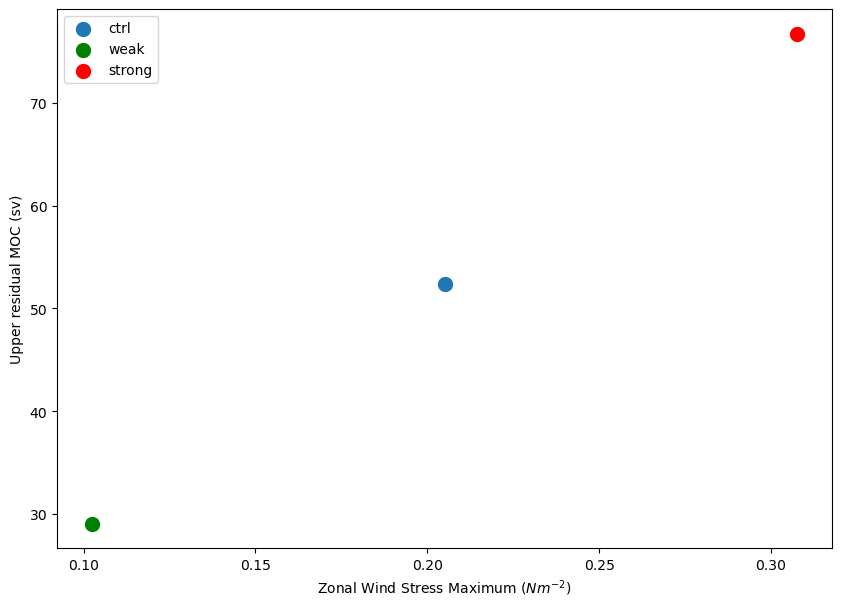

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(max_ctrl_wind, max_ctrl_residual, label='ctrl',  s=100)
plt.scatter(max_weak_wind, max_weak_residual, label='weak',  s=100 , color='green')
plt.scatter(max_strong_wind, max_strong_residual, label='strong', s=100, color='red')
plt.xlabel('Zonal Wind Stress Maximum ($Nm^{-2}$)')
plt.ylabel('Upper residual MOC (sv)')
#plt.title('time mean zonally averaged zonal wind stress maximum versus \n \
          #the maximum of the subpolar cell of the residual MOC'.upper(), fontweight='bold')
plt.legend()
plt.savefig('Result 2b.jpg', dpi=300, bbox_inches='tight')

In [42]:
delta_mld_ctrl_weak_winter_avg=mld_weak_s_winter_avg-mld_ctrl_s_winter_avg
delta_mld_ctrl_strong_winter_avg=mld_strong_s_winter_avg-mld_ctrl_s_winter_avg

In [43]:
np.max(delta_mld_ctrl_weak_winter_avg)

121.02093

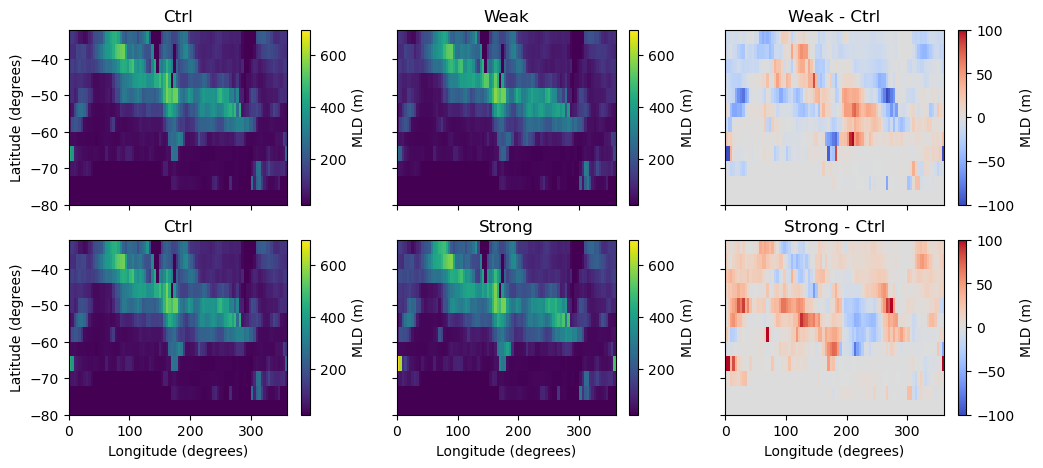

In [44]:
#ctrl+weak mld
fig, ax=plt.subplots(2,3, figsize=(12,5), sharey=True, sharex=True)
#plt.suptitle('Maps of the control, sensitivity and response \n of the winter mixed layer depths'.upper(),
             #fontweight='bold', y=1.02)
a=ax[0,0].pcolormesh(xcc, ycc, mld_ctrl_s_winter_avg, vmin=25, vmax=mld_strong_s_winter_avg.max())
ax[0,0].set_title('Ctrl')
ax[0,0].set_ylabel('Latitude (degrees)')
plt.colorbar(a, label='MLD (m)')

b=ax[0,1].pcolormesh(xcc, ycc, mld_weak_s_winter_avg, vmin=25, vmax=mld_strong_s_winter_avg.max())
ax[0,1].set_title('Weak')
plt.colorbar(b, label='MLD (m)')

c=ax[0,2].pcolormesh(xcc, ycc, delta_mld_ctrl_weak_winter_avg, cmap='coolwarm',vmin=-100, vmax=100)
ax[0,2].set_title('Weak - Ctrl')
plt.colorbar(c, label='MLD (m)')

#ctrl+strong mld
d=ax[1,0].pcolormesh(xcc, ycc, mld_ctrl_s_winter_avg, vmin=25, vmax=mld_strong_s_winter_avg.max())
ax[1,0].set_xlabel('Longitude (degrees)')
ax[1,0].set_ylabel('Latitude (degrees)')
ax[1,0].set_title('Ctrl')
plt.colorbar(d,label='MLD (m)')

e=ax[1,1].pcolormesh(xcc, ycc, mld_strong_s_winter_avg, vmin=25, vmax=mld_strong_s_winter_avg.max())
ax[1,1].set_xlabel('Longitude (degrees)')
ax[1,1].set_title('Strong')
plt.colorbar(e, label='MLD (m)')

f=ax[1,2].pcolormesh(xcc, ycc, delta_mld_ctrl_strong_winter_avg, cmap='coolwarm',vmin=-100, vmax=100)
ax[1,2].set_xlabel('Longitude (degrees)')
ax[1,2].set_title('Strong - Ctrl')
plt.colorbar(f, label='MLD (m)')

#----------adjust----------
#plt.subplots_adjust(wspace=0.05)
plt.savefig('Result 3.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
mld_ctrl_zonal_average=np.mean(mld_ctrl_s_winter_avg,axis=1)
mld_strong_zonal_average=np.mean(mld_strong_s_winter_avg,axis=1)
mld_weak_zonal_average=np.mean(mld_weak_s_winter_avg,axis=1)

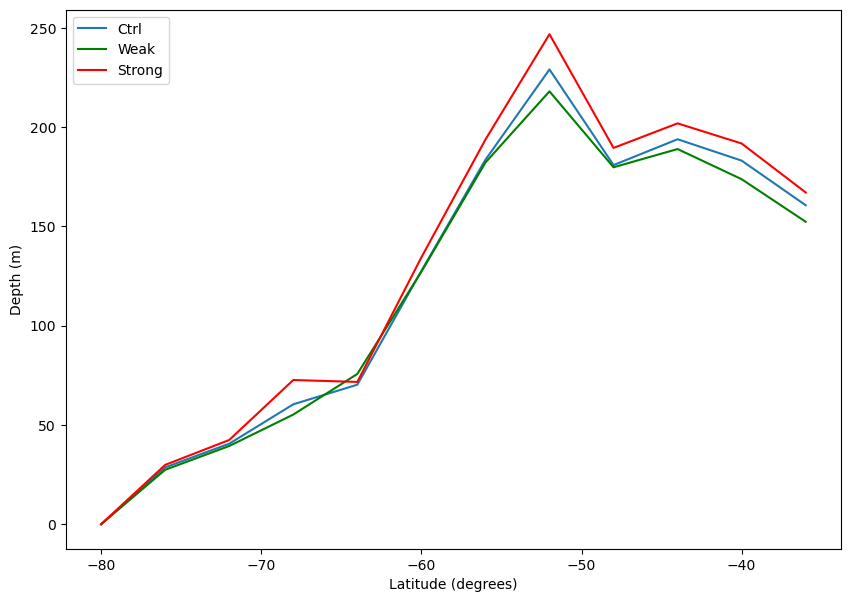

In [46]:
plt.figure(figsize=(10,7))
plt.plot(yp1[:12], mld_ctrl_zonal_average, label='Ctrl')
plt.plot(yp1[:12], mld_weak_zonal_average, label='Weak',color='green')
plt.plot(yp1[:12], mld_strong_zonal_average, label='Strong', color='red')

plt.legend(loc='upper left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Depth (m)')
#plt.title('Zonal average of the winter mixed layer depth \n for each simulation'.upper(), fontweight='bold')
plt.savefig('Result 4.jpg', dpi=300, bbox_inches='tight')
plt.show()


##### Age tracer 

In [47]:
Age_tracer_ctrl_zonal_average=np.mean(Age_tracer_ctrl[-1,:,:,:], axis=-1)
Age_tracer_strong_zonal_average=np.mean(Age_tracer_strong[-1,:,:,:], axis=-1)
Age_tracer_weak_zonal_average=np.mean(Age_tracer_weak[-1,:,:,:], axis=-1)

delta_age_tracer_ctrl_strong_avg=Age_tracer_strong_zonal_average - Age_tracer_ctrl_zonal_average
delta_age_tracer_ctrl_weak_avg=Age_tracer_weak_zonal_average - Age_tracer_ctrl_zonal_average

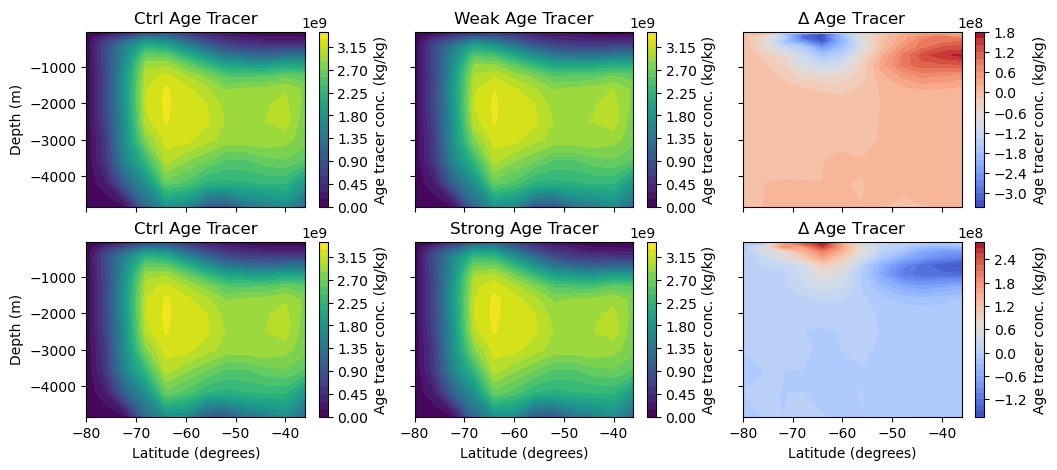

In [48]:
#ctrl+weak mld
fig, ax=plt.subplots(2,3, figsize=(12,5), sharey=True, sharex=True)
#plt.suptitle('Zonally Averaged Section of the control, Sensitivity and Response of the Age Tracer Averaged over the last year'.upper(),fontweight='bold', y=1.03)

a=ax[0,0].contourf(yp1[:12], z, Age_tracer_ctrl_zonal_average[:,:12], levels=30)
ax[0,0].set_title('Ctrl Age Tracer')
ax[0,0].set_ylabel('Depth (m)')
plt.colorbar(a, label='Age tracer conc. (kg/kg)')

b=ax[0,1].contourf(yp1[:12], z, Age_tracer_weak_zonal_average[:,:12], levels=30)
ax[0,1].set_title('Weak Age Tracer')
plt.colorbar(b, label='Age tracer conc. (kg/kg)')

c=ax[0,2].contourf(yp1[:12], z, delta_age_tracer_ctrl_weak_avg[:,:12], cmap='coolwarm', levels=30)
ax[0,2].set_title('$\Delta$ Age Tracer')
plt.colorbar(c, label='Age tracer conc. (kg/kg)')

#ctrl+strong mld
d=ax[1,0].contourf(yp1[:12], z, Age_tracer_ctrl_zonal_average[:,:12], levels=30)
ax[1,0].set_ylabel('Depth (m)')
ax[1,0].set_xlabel('Latitude (degrees)')
ax[1,0].set_title('Ctrl Age Tracer')
plt.colorbar(d,label='Age tracer conc. (kg/kg)')

e=ax[1,1].contourf(yp1[:12], z, Age_tracer_strong_zonal_average[:,:12],levels=30)
ax[1,1].set_xlabel('Latitude (degrees)')
ax[1,1].set_title('Strong Age Tracer')
plt.colorbar(e, label='Age tracer conc. (kg/kg)')

f=ax[1,2].contourf(yp1[:12], z, delta_age_tracer_ctrl_strong_avg[:,:12], levels=30,cmap='coolwarm',)
ax[1,2].set_xlabel('Latitude (degrees)')
ax[1,2].set_title('$\Delta$ Age Tracer')
plt.colorbar(f, label='Age tracer conc. (kg/kg)')

#----------adjust----------
#plt.subplots_adjust(wspace=0.05)
plt.savefig('Result 5.jpg', dpi=300, bbox_inches='tight')
plt.show()


In [49]:
GM_MOC_strong_sv_10yr_avg.max()

10.784351392718762

In [50]:
np.max(Eulerian_MOC_sv)

54.354018088753214

In [51]:
(salt_ctrl_obs_s[salt_ctrl_obs_s>0]).size

7145

In [52]:
(salt_ctrl_obs_s[salt_ctrl_obs_s==0]).size

4488

In [53]:
(ptemp_ctrl_obs_s[ptemp_ctrl_obs_s>0]).size

8594

In [54]:
(ptemp_ctrl_obs_s[ptemp_ctrl_obs_s<=0]).size

7606

In [55]:
(ptemp_ctrl_obs_s[ptemp_ctrl_obs_s==0]).size

4485

In [56]:
Age_tracer_weak_zonal_average.max()

3325309400.0

In [57]:
Age_tracer_strong_zonal_average.max()

3338249500.0

In [58]:
Age_tracer_ctrl_zonal_average.max()

3330666000.0

In [59]:
delta_age_tracer_ctrl_strong_avg.max()

282906800.0

In [60]:
delta_age_tracer_ctrl_weak_avg.max()

165558660.0

In [61]:
max_ctrl_transport

107.05392891434319

In [62]:
max_weak_transport

98.8437950384075

In [63]:
max_strong_transport

123.11150283080046